# YOLOV3 object detection

In this example, we'll demonstrate YOLOV3 object detection using OpenCV and the pretrained DarkNet model, provided by the author of YOLO. The model is trained using the COCO dataset.

In [24]:
import os
import cv2
import numpy as np
import requests

Add some boiler plate code that downloads and stores several configuration and data files. We will start with the YOLOv3 network configuration yolo_config and weights, and we will us ethem to initalize the net network

In [25]:
# Download YOLO net config file
# We'll it from the YOLO author's github repo
yolo_config = 'yolov3.cfg'
if not os.path.isfile(yolo_config):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
    r = requests.get(url)
    with open(yolo_config, 'wb') as f:
        f.write(r.content)

# Download YOLO net weights
# We'll it from the YOLO author's website
yolo_weights = 'yolov3.weights'
if not os.path.isfile(yolo_weights):
    url = 'https://pjreddie.com/media/files/yolov3.weights'
    r = requests.get(url)
    with open(yolo_weights, 'wb') as f:
        f.write(r.content)

Instanitate the model using cv2

In [26]:
net = cv2.dnn.readNet(yolo_weights, yolo_config)

We will download the names of the COCO dataset classess that the network can detect. Which contains 80 categories

In [27]:
# Download class names file
# Contains the names of the classes the network can detect
classes_file = "coco.names"
if not os.path.isfile(classes_file):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)

# load class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [28]:
len(classes)

80

We'll continue with loading the input image, where we want to detect the objects:

In [29]:
# Download object detection image
image_file = 'source_1.png'
if not os.path.isfile(image_file):
    url = "https://raw.githubusercontent.com/ivan-vasilev/advanced-deep-learning-with-python/refs/heads/master/chapter04-detection-segmentation/source_1.png"
    r = requests.get(url)
    with open(image_file, 'wb') as f:
        f.write(r.content)

# read and normalize image
image = cv2.imread(image_file)
# Preprocess the image into a blob
blob = cv2.dnn.blobFromImage(
            image=image, 
            scalefactor=1/255.0, 
            size=(416, 416), 
            mean=(0, 0, 0), 
            swapRB=True, 
            crop=False
)


In [30]:
blob.shape

(1, 3, 416, 416)

Feed the image to the network and do the inference

In [31]:
# set as input to the net
net.setInput(blob)
# get networkout output layers
layer_names = net.getLayerNames()

In [9]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [32]:
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


In [33]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [34]:
# inference - the network outputs multiple lists of anchor boxes; one for each detected class
outs = net.forward(output_layers)

In [35]:
np.asarray(outs).shape

/home/victord/git/Advanced-Deep-Learning-with-Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(3,)

In [36]:
np.asarray(outs)[0].shape

/home/victord/git/Advanced-Deep-Learning-with-Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(507, 85)

In [37]:
np.asarray(outs)[1].shape

/home/victord/git/Advanced-Deep-Learning-with-Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(2028, 85)

In [38]:
np.asarray(outs)[2].shape

/home/victord/git/Advanced-Deep-Learning-with-Python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(8112, 85)

### Shapes of Each `outs[i]`

Each `outs[i]` is a 2D array with shape `(number_of_predictions, C + 5)`:

- **`number_of_predictions`**: The number of grid cells in the layer multiplied by the number of anchor boxes. This varies depending on the layer.
- **`C + 5`**:
  - **`C`**: Number of classes in your model (e.g., 80 for COCO dataset).
  - **`5`**: These correspond to 5 specific values for each predicted bounding box:
    - **`x`**: X-coordinate of the center of the bounding box.
    - **`y`**: Y-coordinate of the center of the bounding box.
    - **`w`**: Width of the bounding box.
    - **`h`**: Height of the bounding box.
    - **`confidence`**: Confidence score for the bounding box.

For example, if there are 80 classes, the total dimension is `85` (`80 + 5`).

---

### Why Shapes are Different Across Layers

Each YOLO layer outputs a different number of predictions due to different grid sizes:

- **Layer 1** (e.g., 13x13 grid): `(507, 85)` → `507 = 13 x 13 x 3` (3 anchor boxes per grid cell).
- **Layer 2** (e.g., 26x26 grid): `(2028, 85)` → `2028 = 26 x 26 x 3`.
- **Layer 3** (e.g., 52x52 grid): `(8112, 85)` → `8112 = 52 x 52 x 3`.


Iterate over the classes and anchor boxes and preeepare them for the next step

In [39]:
# extract bounding boxes
LARGE, MEDIUM, SMALL = 0, 1, 2
class_ids, confidences, boxes = [[], [], []], [[], [], []], [[], [], []]

# iterate over all classes
for idx, scale_out in enumerate(outs):
    # iterate over the anchor boxes for each class
    for (x, y, w, h, confidence, *class_preds) in scale_out:
        # bounding box
        # x is a fraction of the image's width.
        # y is a fraction of the image's height.
        # w is a fraction of the image's width.
        # h is a fraction of the image's height.
        center_x = int(x * image.shape[1])
        center_y = int(y * image.shape[0])
        w, h = int(w * image.shape[1]), int(h * image.shape[0])
        x, y = center_x - w // 2, center_y -h // 2
        boxes[idx].append([x, y, w, h])
        # confidence
        confidences[idx].append(confidence)
        # class
        class_ids[idx].append(np.argmax(class_preds))
    

In [40]:
[len(class_ids[LARGE]), len(class_ids[MEDIUM]), len(class_ids[SMALL])]
    

[507, 2028, 8112]

Remove the noise with non-max suppression - use different values of `score_threshold` and `nms_threshold`

In [41]:
# non-max supression
ids = [[], [], []]
for i in (LARGE, MEDIUM, SMALL):
    ids[i] = cv2.dnn.NMSBoxes(boxes[i], confidences[i], score_threshold=0.75, nms_threshold=0.5)
    

In [42]:
ids

[array([286, 345], dtype=int32),
 array([1315, 1139, 1153], dtype=int32),
 array([4646, 4843], dtype=int32)]

In [43]:
import cv2
import numpy as np

def draw_bounding_boxes(image, scale_index, ids, boxes, confidences, class_ids, classes):
    """
    Draw bounding boxes for a specific scale on the given image.

    Args:
        image (np.array): The image on which to draw the bounding boxes.
        scale_index (int): The scale index (LARGE, MEDIUM, SMALL).
        ids (list): List of indices of bounding boxes retained after NMS for each scale.
        boxes (list): List of bounding boxes for each scale.
        confidences (list): List of confidence scores for each scale.
        class_ids (list): List of class IDs for each scale.
        classes (list): List of class names corresponding to class IDs.

    Returns:
        np.array: The image with bounding boxes drawn for the specified scale.
    """
    # Define colors for scales
    scale_colors = {
        LARGE: (0, 255, 0),   # Green for LARGE
        MEDIUM: (255, 0, 0),  # Blue for MEDIUM
        SMALL: (0, 0, 255)    # Red for SMALL
    }

    # Get the color for the current scale
    color = scale_colors[scale_index]

    # Iterate over retained indices for the specified scale
    for i in ids[scale_index]:  # Flatten to handle NMSBoxes() output
        # Get bounding box, confidence, and class ID
        x, y, w, h = boxes[scale_index][i]
        confidence = confidences[scale_index][i]
        class_id = class_ids[scale_index][i]

        # Draw the bounding box
        cv2.rectangle(
            img=image,
            pt1=(round(x), round(y)),
            pt2=(round(x + w), round(y + h)),
            color=color,
            thickness=3
        )

        # Add class label and confidence text
        cv2.putText(
            img=image,
            text=f"{classes[class_id]}: {confidence:.2f}",
            org=(round(x), round(y - 10)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.8,
            color=color,
            thickness=2
        )

    return image



Draw the bounding boxes and their captions on the image

In [46]:
# Example usage of the function
# Assuming LARGE, MEDIUM, SMALL are defined as 0, 1, 2 respectively

# Draw bounding boxes for LARGE scale
output_image_large = draw_bounding_boxes(image.copy(), LARGE, ids, boxes, confidences, class_ids, classes)

# Draw bounding boxes for MEDIUM scale
output_image_medium = draw_bounding_boxes(image.copy(), MEDIUM, ids, boxes, confidences, class_ids, classes)

# Draw bounding boxes for SMALL scale
output_image_small = draw_bounding_boxes(image.copy(), SMALL, ids, boxes, confidences, class_ids, classes)



In [47]:
from matplotlib import pyplot as plt
import cv2

# Convert the images from BGR to RGB for proper display in Matplotlib
output_image_large_rgb = cv2.cvtColor(output_image_large, cv2.COLOR_BGR2RGB)
output_image_medium_rgb = cv2.cvtColor(output_image_medium, cv2.COLOR_BGR2RGB)
output_image_small_rgb = cv2.cvtColor(output_image_small, cv2.COLOR_BGR2RGB)



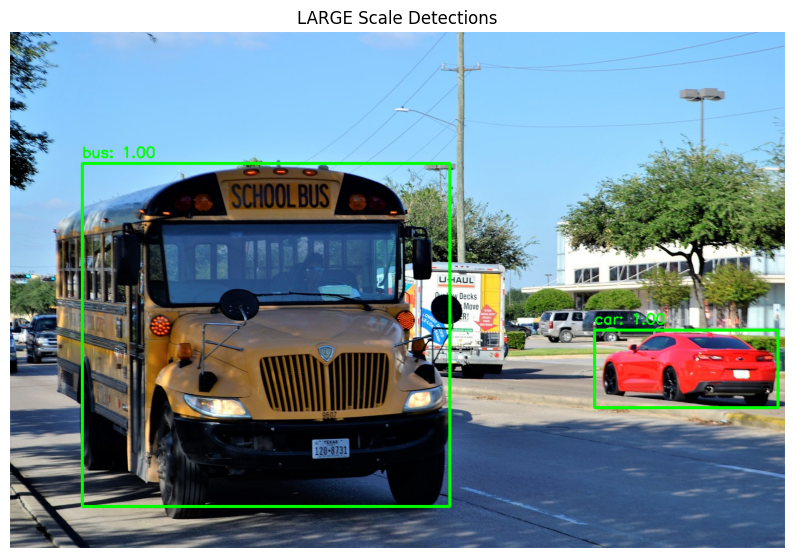

In [48]:
# Display the LARGE scale detections
plt.figure(figsize=(10, 10))
plt.title("LARGE Scale Detections")
plt.imshow(output_image_large_rgb)
plt.axis("off")
plt.show()



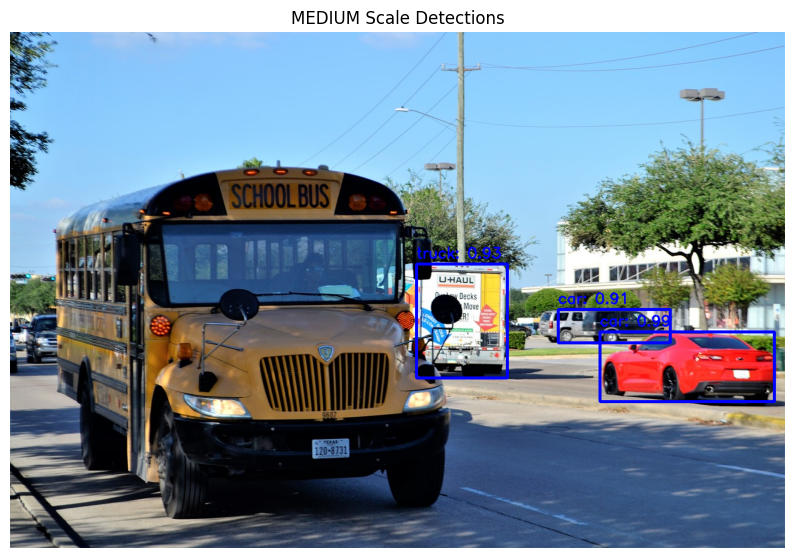

In [49]:
# Display the MEDIUM scale detections
plt.figure(figsize=(10, 10))
plt.title("MEDIUM Scale Detections")
plt.imshow(output_image_medium_rgb)
plt.axis("off")
plt.show()


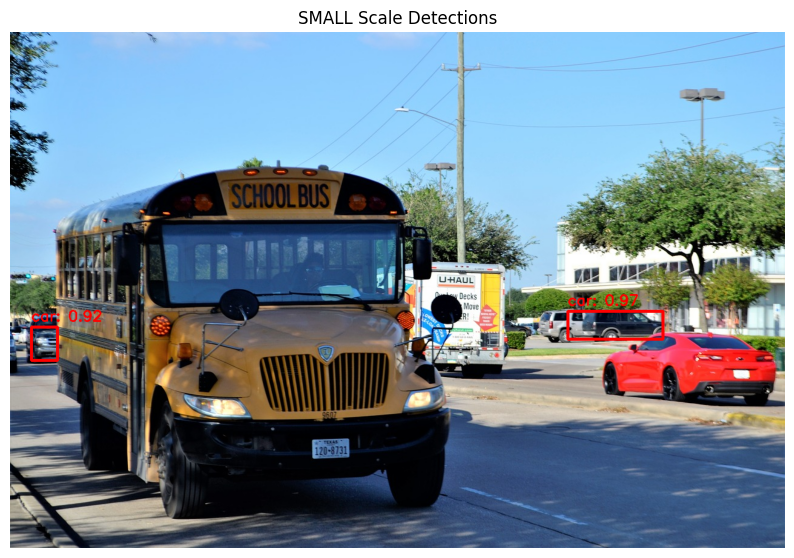

In [50]:

# Display the SMALL scale detections
plt.figure(figsize=(10, 10))
plt.title("SMALL Scale Detections")
plt.imshow(output_image_small_rgb)
plt.axis("off")
plt.show()
